In [18]:
'''
Dataset Name: Advertising Dataset

🔗https://www.kaggle.com/datasets/ashydv/advertising-dataset
Business Scenario
A retail company spends money on advertising to increase product sales.

The marketing team believes that TV advertising spend has a strong impact on sales.
The management wants answers to the following question:
“If we increase our TV advertising budget, how will it affect sales?”
You are hired as a data analyst to analyze this relationship and build a predictive model.
📝 Tasks
Load the given dataset and explore its columns.
Use TV advertising spend as the input feature and Sales as the target variable.
Build a model that can learn the relationship between TV spend and Sales.
Train the model using historical data.
Predict sales for unseen data points.
Predict sales when TV advertising spend is 150 units.
Measure how accurate your predictions are.
Visualize:
The actual data points
The best-fit straight line learned by the model
Interpret the result in simple business terms:
Does higher TV spend increase sales?
Is the prediction error acceptable?
Suggest one improvement to make the prediction better.
Advertising Dataset | Kaggle
Kaggle is the world’s largest data science community with powerful tools and resources to help you achieve your data science goals.

'''

'\nDataset Name: Advertising Dataset\n\n🔗https://www.kaggle.com/datasets/ashydv/advertising-dataset\nBusiness Scenario\nA retail company spends money on advertising to increase product sales.\n\nThe marketing team believes that TV advertising spend has a strong impact on sales.\nThe management wants answers to the following question:\n“If we increase our TV advertising budget, how will it affect sales?”\nYou are hired as a data analyst to analyze this relationship and build a predictive model.\n📝 Tasks\nLoad the given dataset and explore its columns.\nUse TV advertising spend as the input feature and Sales as the target variable.\nBuild a model that can learn the relationship between TV spend and Sales.\nTrain the model using historical data.\nPredict sales for unseen data points.\nPredict sales when TV advertising spend is 150 units.\nMeasure how accurate your predictions are.\nVisualize:\nThe actual data points\nThe best-fit straight line learned by the model\nInterpret the result in

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [20]:
data = pd.read_csv('advertising.csv')
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [31]:
x = data[['TV']].values
y = data['Sales'].values

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [33]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
print("Slope (m):", model.coef_[0])
print("Intercept (c):", model.intercept_)

Slope (m): 0.05548294393146318
Intercept (c): 7.007108428241851


In [35]:
y_pred = model.predict(x_test)
y_pred

array([16.06747317, 17.84847567, 23.25806271,  7.65625887, 19.23000098,
       11.17387752, 19.03581067,  9.78125562, 19.34651516, 16.72217191,
        8.75482116, 10.12524988, 20.01785878,  7.30671633, 14.74697911,
       16.45030549,  7.41213392, 17.97053815, 11.18497411, 20.17875932,
       19.74044406, 10.76885203,  9.1154603 , 20.92777906, 10.83543156,
        9.97544593, 18.85271696, 14.73588252, 11.84522114,  7.47316516,
       18.09260063, 10.84652815, 18.04266598,  7.94477018, 22.58117079,
       20.22314567,  9.68693462, 22.19279018, 13.50970946,  8.53288939])

In [42]:
new_data = np.array([[150]])  
predicted_sales = model.predict(new_data)
 
print("Predicted sales:", predicted_sales[0])

Predicted sales: 15.329550017961328


In [43]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 6.101072906773964


In [44]:
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

R-squared: 0.802561303423698


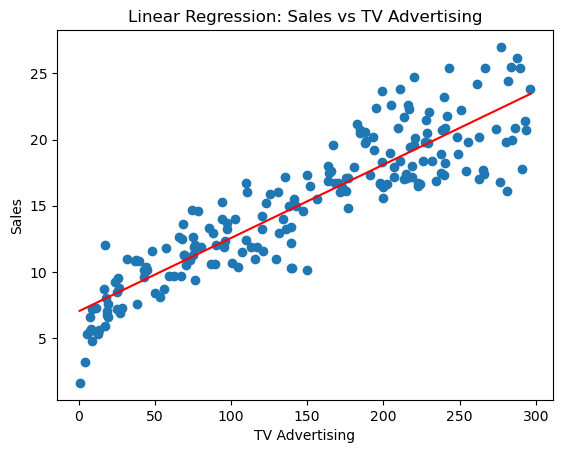

In [45]:
# Create smooth values for TV feature (for visualization)
TV_line = np.linspace(x[:, 0].min(), x[:, 0].max(), 100).reshape(-1, 1)

# Predict sales along the TV range using the trained 1-feature model
y_line = model.predict(TV_line)

# Plot actual data points (using TV vs Sales)
plt.figure()
plt.scatter(x[:, 0], y)

# Plot regression line
plt.plot(TV_line, y_line, color='red')

# Labels and title
plt.xlabel("TV Advertising")
plt.ylabel("Sales")
plt.title("Linear Regression: Sales vs TV Advertising")

# Show plot
plt.show()
 